<a href="https://colab.research.google.com/github/meridethfrey/ResonanceCourse/blob/master/ExampleDataAnalysis/Using_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier Transforms
Most numerical ways of calculating discrete Fourier transforms use the very clever algorithm of the 'fast Fourier transform' (FFT). **If you want more information about this algorithm, [check out this blog post.](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)** Fourier transforms are a key tool in signal processing and data analysis toolkit, and the FFT algorithm is what is used by *everyone* in the industry, so if you plan on ever doing further data science, be sure to learn about it! Fortunately, `numpy` has a highly optimized version of the FFT (faster than the one you would code yourself, unless you are an expert in Fortran and optimization methods!)

The purpose of this exercise is to learn how to use the FFT to analyze different data sets, and you will get to try it out and other data sets yourself in this week's assignment.


In [0]:
# numpy is the main Python array library
import numpy as np 
# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 
%matplotlib inline

## Generating Time-Domain Data
First, let's generate some time-domain data to test that the Fourier transform behaves as we expect.

Our example signal will be the sum of two sine waves, with different amplitudes and whose frequencies differ by a factor of two.

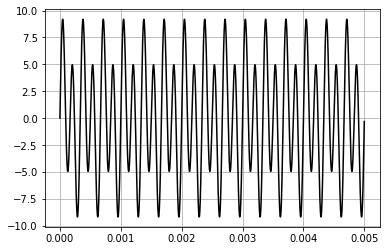

In [12]:
Fstep    = 1e6    # [Hz] sampling rate
Tstep    = 1/Fstep   # [s]  sampling interval (time interval between samples)
tmin  = 0      # [s]  start time
tmax  = 5e-3   # [s]  end time
time = np.arange(tmin, tmax, Tstep)  # [s] time samples

f1    = 3e3          # [Hz]  Signal frequency
omega = f1*(2*np.pi) # [rad/s] Signal angular frequency
y = 3.0*np.sin(omega*time) + 7.0*np.sin(2*omega*time)
plt.plot(time, y, 'k-')
plt.grid()

##Taking the Fourier Transform
We then compute the fourier transform, and from the resulting Fourier spectrum, we should be able to identify the frequencies in the data. We expect two peaks, one for each input frequency, and the amplitudes of the peaks should correspond to the amplitudes of the original input sine waves.

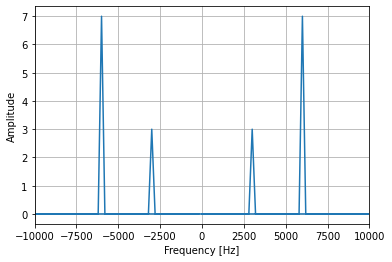

In [13]:
def fourierCompare(Tstep,time,y):
    spec   = np.fft.fft(y)#........................compute the FTT
    spec   = np.abs(spec)/(0.5*len(time))#.............compute the magnitude of the (complex) FTT (the abs value) and normalize
    freq = np.fft.fftfreq(len(time),Tstep) #..........compute the corresponding frequencies [Hz]
    plt.plot(freq, spec)#..................plot the frequency Vs. amplitude graph
    plt.xlim(xmin=-10000, xmax=10000)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude') 
    plt.grid()

fourierCompare(Tstep, time,y)

Notice that both positive and negative frequencies show up with equal proportions. (The real data we provided could be generated by either CW or CCW rotations in the complex plane.) We can limit the frequencies to positive values, since that is providing the data we desire.

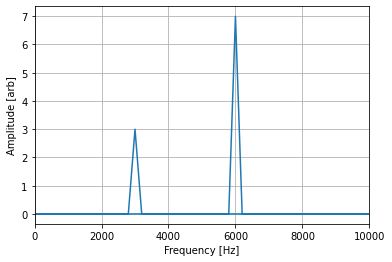

In [14]:
def fourier(Tstep,time,y):
    spec   = np.fft.fft(y)
    spec   = np.abs(spec)/(0.5*len(time))
    freq = np.fft.fftfreq(len(time),Tstep)
    plt.plot(freq, spec)
    plt.xlim(xmin=0, xmax=10000)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [arb]')
    plt.grid()

fourier(Tstep, time,y)

By having more data points, we can have a peak with narrower width.

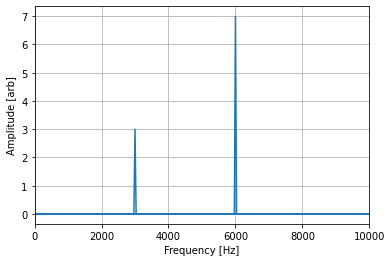

In [15]:
t = np.arange(tmin, 6*tmax, Tstep)  # we multiplied tmax to get more data points with the same step size.
y = 3.0*np.sin(omega*t) + 7.0*np.sin(2*omega*t)
fourier(Tstep, t, y)

And as we gather more and more data points, our fourier transform becomes a delta function.

## The Nyquist Critical Frequency
Since our data is discrete and is being sampled at a particular rate (the `Fstep` defined above), there is an important criterion we need to obey in order to get a Fourier spectrum that makes sense. This is the Nyquist-Shannon sampling theorem.

$$
f_c=\frac{1}{2\textrm{Tstep}}
$$

Since the critical sampling rate of a sine wave is two samples per cycle, if a function is bandwidth-limited to frequencies smaller in magnitude than the $f_c$ (i.e. the maximum frequency of the signal is less than the critical sampling rate) then the function is completely determined by this sampling.

Otherwise, any frequency peaks outside the domain[-$f_c$, $f_c$] is moved into this domain, causing aliasing.

This means, if you expect signal to have maximum frequency, $f_\textrm{max}$, then your sampling rate should be at least two times this maximum frequency to satisfy the Nyquist-Shannon criterion.

$$ \textrm{Fstep} = \frac{1}{\textrm{Tstep}} > 2f_\textrm{max}$$

Check out this short video for some information on the Nyquist critical frequency and aliasing.
https://www.youtube.com/watch?v=v7qjeUFxVwQ

Here is a fun applet you can play with to better understand aliasing and the importance of sampling at a high enough rate: http://195.134.76.37/applets/AppletNyquist/Appl_Nyquist2.html

Below I will define a new functions that will get the Fourier spectrum data and plot the frequency spectrum showing only positive frequencies up to $f_c$.

In [0]:
def GetFourierSpectrum(Tstep,time,y):
    spec   = np.fft.fft(y)
    spec   = np.abs(spec)/(0.5*len(time))
    freq = np.fft.fftfreq(len(time),Tstep)
    return freq, spec

def PlotFourierSpectrum(Tstep, freq, spec):
    plt.plot(freq, np.abs(spec))#......only look at the "positive frequencies" and gives us one-sided power spectral density(PSD)
    plt.xlim(xmin=0, xmax=1/(2*Tstep))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [arb]')
    plt.grid()

###Exercise 1
Determine the critical frequency (often called the Nyquist frequency) for the `Tstep` value we used above. Then create time-domain signal that has a frequency that is *larger* than this critical frequency value.

Plot the Fourier spectrum for this new signal. You should now see aliasing. Does the 'aliased' peak location make sense? *Hint: The aliased peaked will be reflected about the Nyquist frequency into your frequency domain.*

##Now let's analyze some data!
The real power of the Fourier Transform can be seen when you analyze real time-domain data and extract the frequency spectrum to tell you helpful information.

For this example, I have included in the "Helpful Notebooks" folder a data file called `ECG1Time.tsv` that you will need to upload to your Google Colaboratory notebook. This is a "tab-separated values" file, so `delimiter='\t'` should be used.

This file gives the electrocardiogram (ECG) signal for a particular patient.


In [0]:
time, ECG = np.loadtxt('ECG1Time.tsv', delimiter='\t', unpack=True)

Let's first plot this time-domain signal.

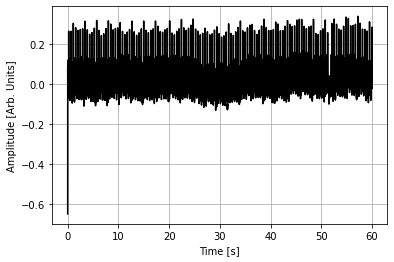

In [18]:
plt.plot(time, ECG, 'k-')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [Arb. Units]")
plt.grid()

Hard to get much information out of that, so let's zoom into the first two seconds of data acquisition.

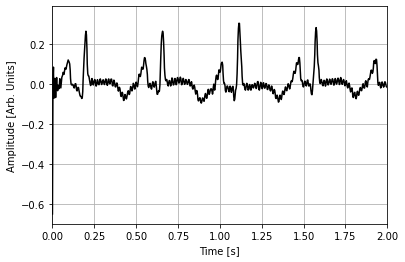

In [19]:
plt.plot(time, ECG, 'k-')
plt.xlim(0,2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [Arb. Units]")
plt.grid()

What do you think is being shown here?

In order to take the Fourier transform (using the useful function `PlotFourierSpectrum` defined above), we need to know the time step for the data taken. This is essentially the difference between two consecutive time points, which can be calculated below.

In [20]:
print("Tstep = ", time[1] - time[0])

Tstep =  0.003


Now we can call our `fourier` function and see what the Fourier spectrum looks like for this data!

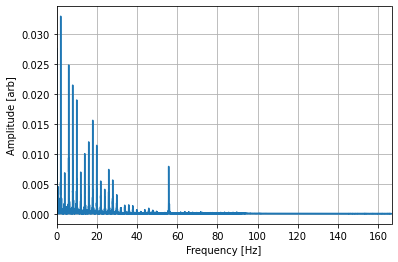

In [22]:
freq,spec = GetFourierSpectrum(0.003, time, ECG)
PlotFourierSpectrum(0.003, freq, spec)

As you can see, you get a lot of harmonics, and a noticeable peak near 60 Hz (any idea about what that could be the cause of that signal?)

The most important peak will be the fundamental (the lowest-frequency peak, typically with the largest amplitude.) Let's zoom in to look at this peak.

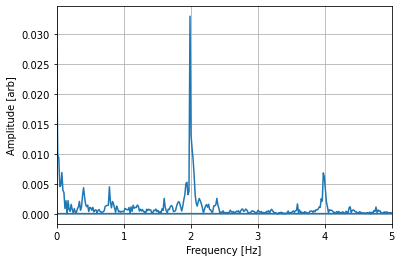

In [23]:
plt.plot(freq, np.abs(spec))#......only look at the "positive frequencies" and gives us one-sided power spectral density(PSD)
plt.xlim(xmin=0, xmax=5)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [arb]')
plt.grid()

###Exercise 2
Answer the following questions:
* What is this peak representing?
* Why do you think the data set was taken over such a long time?
* Calculate the Nyquist critical frequency for this data set.
* Do you think the sampling rate chosen (1/`Tstep`) was appropriate for this data set? Why or why not? *Hint: how does the Nyquist critical frequency compare with the highest frequency signal peak observed?*

# **BE SURE TO SHARE YOUR NOTEBOOK WITH MERIDETH TO GET CREDIT FOR THIS LAB**
Share with meri.frey@gmail.com.